<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [30]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 
import os
import re

from functools import reduce
from collections import defaultdict 

# Customer Analysis

In [31]:
os.listdir()

['.config',
 'match_result_test.csv',
 'ecommerce-data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'mock_sales_data.csv',
 'sales_vs_discount.csv',
 '1_order_payments_dataset.csv',
 'mall_customers.csv',
 'scanner_data.csv',
 'sales_data_with_stores.csv',
 'groceries.csv',
 'sample-sales-data.csv',
 'sales.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail_II.xlsx',
 'test.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'online_retail.xlsx',
 'bz_data_analyis.csv',
 'sample_data']

In [32]:
df = pd.read_csv('sales_vs_discount.csv')
df['date'] = df['date'].to_numpy().astype('datetime64[D]')
df.head()

,date,product,sales_amount,discount
0,2021-04-02,1014,261.241,0.0
1,2021-04-03,1014,271.223,0.0
2,2021-04-04,1014,227.140,0.0
3,2021-04-05,1014,203.027,0.0
4,2021-04-06,1014,242.594,0.0


In [33]:
df['product'].value_counts().reset_index()

,index,product
0,1014,199


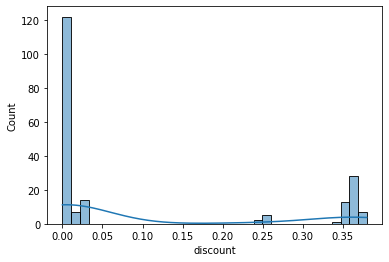

In [34]:
sns.histplot(data = df, x = 'discount', bins = 35 , kde = True)

In [35]:
cuts = [df['discount'] >= .3, df['discount'] > .2, df['discount'] > .0]
df['dis_range'] = np.select(cuts, ['0.3+', '0.2+', '0.1-'], default = '0.0')
df.head()

,date,product,sales_amount,discount,dis_range
0,2021-04-02,1014,261.241,0.0,0.0
1,2021-04-03,1014,271.223,0.0,0.0
2,2021-04-04,1014,227.140,0.0,0.0
3,2021-04-05,1014,203.027,0.0,0.0
4,2021-04-06,1014,242.594,0.0,0.0


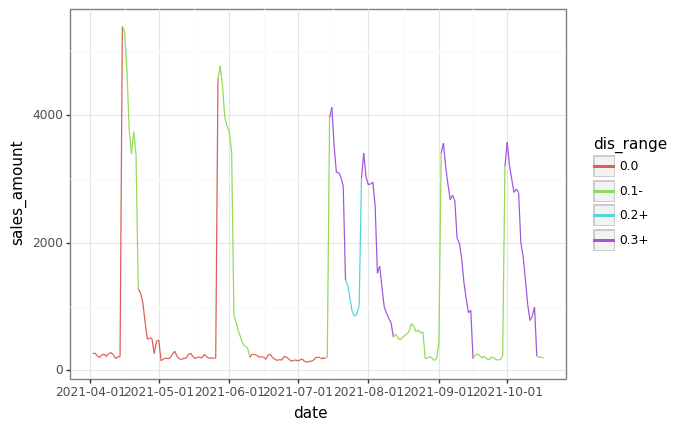

<ggplot: (8754390876724)>

In [36]:
(
    ggplot(df, aes('date', 'sales_amount', color = 'dis_range', group = 1)) +
    gg.geom_line() +
    gg.theme_bw()
)

In [38]:
df['weekday'] = df['date'].dt.weekday
list_wk = dict(zip([0,1,2,3,4,5,6], ['mon','tue','wed','thu','fri','sat','sun']))

df['weekday'] = df['weekday'].apply(lambda x : list_wk.get(x,x))
df.head()

,date,product,sales_amount,discount,dis_range,weekday
0,2021-04-02,1014,261.241,0.0,0.0,fri
1,2021-04-03,1014,271.223,0.0,0.0,sat
2,2021-04-04,1014,227.140,0.0,0.0,sun
3,2021-04-05,1014,203.027,0.0,0.0,mon
4,2021-04-06,1014,242.594,0.0,0.0,tue


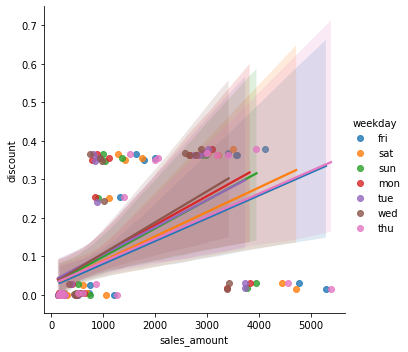

In [39]:
sns.lmplot(data = df, x = 'sales_amount', y = 'discount', hue = 'weekday')

/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_density.py:151: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_density.py:154: PlotnineWarning: Groups with fewer than 2 data points have been removed.
/usr/local/lib/python3.8/dist-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/usr/local/lib/python3.8/dist-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


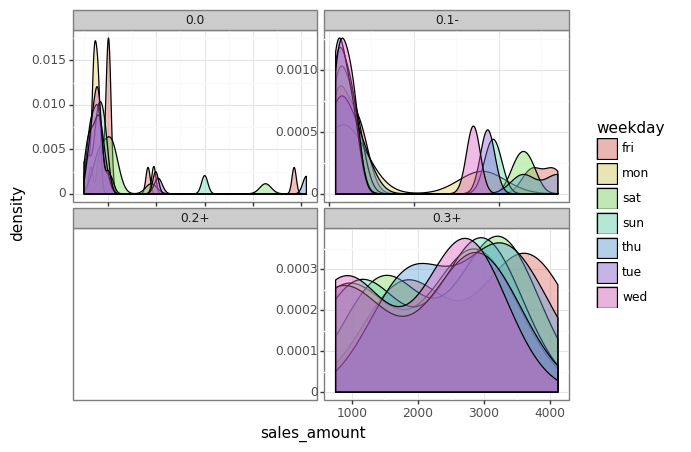

<ggplot: (8754390406885)>

In [43]:
(
    ggplot(df, aes('sales_amount', fill = 'weekday')) +
    gg.geom_density(alpha = .4) +
    gg.facet_wrap('~dis_range', scales = 'free') +
    gg.theme_bw()
)

# Iterators

In [44]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [45]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}